In [20]:
import pandas as pd
import numpy as np

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
pitching_master = pd.read_csv("baseballdatabank-master/core/Pitching.csv")

In [10]:
recent_pitchers = pitching_master[pitching_master['yearID']>2010]

In [18]:
recent_pitchers[recent_pitchers['GS']>=10].columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [21]:
recent_pitchers.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
40433,abadfe01,2011,1,HOU,NL,1,4,29,0,0,0,0,59,28,16,5,9,15,0.326,7.32,0.0,0,1.0,0,99.0,1,18,1.0,2.0,0.0
40434,abreuju01,2011,1,HOU,NL,0,0,7,0,0,0,0,20,6,2,1,3,12,0.231,2.70,0.0,0,5.0,0,34.0,2,2,0.0,0.0,0.0
40435,accarje01,2011,1,BAL,AL,3,3,31,0,0,0,0,113,43,24,5,18,23,0.295,5.73,4.0,0,1.0,0,167.0,7,24,2.0,0.0,4.0
40436,aceveal01,2011,1,BOS,AL,10,2,55,4,0,0,2,342,84,33,8,42,80,0.204,2.61,1.0,1,15.0,2,474.0,15,37,3.0,3.0,9.0
40437,acostma01,2011,1,NYN,NL,4,1,44,0,0,0,4,141,50,18,6,15,46,0.269,3.45,0.0,0,2.0,0,204.0,15,21,0.0,1.0,3.0


In [31]:
recent_pitchers['pyid'] = recent_pitchers['playerID']+recent_pitchers['yearID'].astype(str)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
salaries_master = pd.read_csv("baseballdatabank-master/core/Salaries.csv")

salaries_master['pyid'] = salaries_master['playerID']+salaries_master['yearID'].astype(str)

In [41]:
salaries_master[salaries_master['yearID']>2010].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4974 entries, 21454 to 26427
Data columns (total 6 columns):
yearID      4974 non-null int64
teamID      4974 non-null object
lgID        4974 non-null object
playerID    4974 non-null object
salary      4974 non-null int64
pyid        4974 non-null object
dtypes: int64(2), object(4)
memory usage: 272.0+ KB


In [48]:
p_sal = recent_pitchers.set_index('pyid').join(salaries_master.set_index('pyid')['salary'],lsuffix='_left', rsuffix='_right').dropna()

In [32]:
recent_pitchers.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,pyid
40433,abadfe01,2011,1,HOU,NL,1,4,29,0,0,0,0,59,28,16,5,9,15,0.326,7.32,0.0,0,1.0,0,99.0,1,18,1.0,2.0,0.0,abadfe012011
40434,abreuju01,2011,1,HOU,NL,0,0,7,0,0,0,0,20,6,2,1,3,12,0.231,2.70,0.0,0,5.0,0,34.0,2,2,0.0,0.0,0.0,abreuju012011
40435,accarje01,2011,1,BAL,AL,3,3,31,0,0,0,0,113,43,24,5,18,23,0.295,5.73,4.0,0,1.0,0,167.0,7,24,2.0,0.0,4.0,accarje012011
40436,aceveal01,2011,1,BOS,AL,10,2,55,4,0,0,2,342,84,33,8,42,80,0.204,2.61,1.0,1,15.0,2,474.0,15,37,3.0,3.0,9.0,aceveal012011
40437,acostma01,2011,1,NYN,NL,4,1,44,0,0,0,4,141,50,18,6,15,46,0.269,3.45,0.0,0,2.0,0,204.0,15,21,0.0,1.0,3.0,acostma012011


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

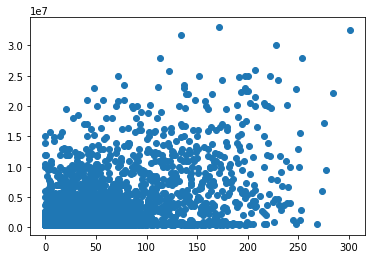

In [54]:
plt.scatter(p_sal['SO'],p_sal['salary'])

In [57]:
p_sal['log_salary'] = p_sal['salary'].apply(lambda x: np.log10(x))

In [70]:
p_sal

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary,log_salary
pyid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aardsda012012,aardsda01,2012,1,NYA,AL,0,0,1,0,0,0,0,3,1,1,1,1,1,0.250,9.00,0.0,0,0.0,0,5.0,1,1,0.0,0.0,0.0,500000.0,5.698970
abadfe012011,abadfe01,2011,1,HOU,NL,1,4,29,0,0,0,0,59,28,16,5,9,15,0.326,7.32,0.0,0,1.0,0,99.0,1,18,1.0,2.0,0.0,418000.0,5.621176
abadfe012012,abadfe01,2012,1,HOU,NL,0,6,37,6,0,0,0,138,57,26,6,19,38,0.311,5.09,1.0,4,3.0,0,208.0,8,27,2.0,1.0,4.0,485000.0,5.685742
abadfe012014,abadfe01,2014,1,OAK,AL,2,4,69,0,0,0,0,172,34,10,4,15,51,0.175,1.57,3.0,0,4.0,0,216.0,17,11,1.0,2.0,6.0,525900.0,5.720903
abadfe012015,abadfe01,2015,1,OAK,AL,2,2,62,0,0,0,0,143,45,22,11,19,45,0.251,4.15,3.0,4,1.0,0,205.0,17,23,3.0,3.0,1.0,1087500.0,6.036429
abadfe012016,abadfe01,2016,1,MIN,AL,1,4,39,0,0,0,1,102,27,10,2,14,29,0.220,2.65,2.0,0,0.0,1,138.0,8,11,0.0,1.0,6.0,1250000.0,6.096910
abadfe012016,abadfe01,2016,2,BOS,AL,0,2,18,0,0,0,0,38,13,9,2,8,12,0.255,6.39,0.0,1,1.0,0,60.0,7,9,0.0,0.0,1.0,1250000.0,6.096910
accarje012011,accarje01,2011,1,BAL,AL,3,3,31,0,0,0,0,113,43,24,5,18,23,0.295,5.73,4.0,0,1.0,0,167.0,7,24,2.0,0.0,4.0,1080000.0,6.033424
aceveal012012,aceveal01,2012,1,BOS,AL,2,10,69,0,0,0,25,252,80,50,11,31,75,0.254,5.36,2.0,3,6.0,1,361.0,55,51,2.0,7.0,4.0,1200000.0,6.079181


In [65]:
corr = p_sal.corr()

In [69]:
corr['salary']

yearID        0.081604
stint         0.033454
W             0.353496
L             0.299468
G            -0.093493
GS            0.380079
CG            0.279652
SHO           0.234270
SV            0.042522
IPouts        0.360068
H             0.348763
ER            0.332393
HR            0.335435
BB            0.254209
SO            0.360327
BAOpp        -0.026542
ERA          -0.063516
IBB          -0.040322
WP            0.157366
HBP           0.236776
BK            0.108810
BFP           0.354417
GF           -0.083140
R             0.330090
SH            0.236571
SF            0.222624
GIDP          0.284439
salary        1.000000
log_salary    0.869452
Name: salary, dtype: float64